# ISAT 252 Covid-19 Overview

In [22]:
import pandas

In [23]:
%matplotlib inline

# Background

Covid-19, commonly refered to as the Corona virus, is a hyper contagious disease that impacts the respiratory system and is thought to spread mostly through breathing contaminated air. Covid-19 has brought the world into a pandemic unlike any before.  Many countries were unprepared to deal with the surge in cases and the onslaught of fatalities. Due to the dangers in public health, quarentining and social distancing have beeen stressed worldwide. This has negatively impacted global economies, raised debt, and put many smaller business to rest. Due to these issues and different circumstances around the globe, countries are operating differently and implementing different strategies to not only combat the disease, but to lessen the impact it has on peoples lives. Some nations have had their efforts deemed successful and others have been declared complete failures. This report will use data collected from the European Centre for Disease Prevention and Control as shown in the chart below. The data will help assess different aspects pertaining to the Covid-19 outbreak and where the globe stands as of today.

In [24]:
df = pandas.read_excel('s3://buckethead252/COVID-19-geographic-disbtribution-worldwide.xlsx')

df[:10]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-06-10,10,6,2020,542,15,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-06-09,9,6,2020,575,12,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-06-08,8,6,2020,791,30,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-06-07,7,6,2020,582,18,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-06-06,6,6,2020,915,9,Afghanistan,AF,AFG,37172386.0,Asia
5,2020-06-05,5,6,2020,787,6,Afghanistan,AF,AFG,37172386.0,Asia
6,2020-06-04,4,6,2020,758,24,Afghanistan,AF,AFG,37172386.0,Asia
7,2020-06-03,3,6,2020,759,5,Afghanistan,AF,AFG,37172386.0,Asia
8,2020-06-02,2,6,2020,545,8,Afghanistan,AF,AFG,37172386.0,Asia
9,2020-06-01,1,6,2020,680,8,Afghanistan,AF,AFG,37172386.0,Asia


# 1. Current Global Covid-19 Situation

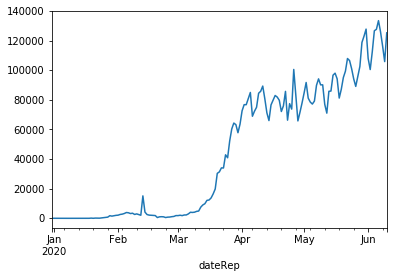

In [25]:
sum_cases_by_date = df.groupby("dateRep").sum()["cases"]

sum_cases_by_date.plot()

The number of cases due to the global pandemic rose signifiantly in mid March; howevor, the upward trend starts at the begining of March. By the end of march, the bullish trend ends but Covid-19 cases are still rising in an oscilating fashion even as we enter mid June.

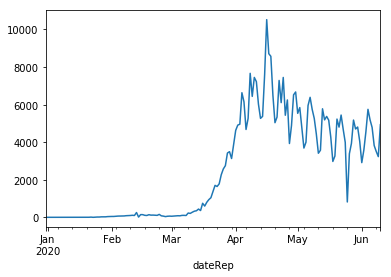

In [26]:
sum_deaths_by_date = df.groupby("dateRep").sum()["deaths"]

sum_deaths_by_date.plot()

The number of deaths due to Covid-19 follows a similar trend to what we see with cases, but deaths seem to decline after the initial spike starting in mid march. The number of deaths could be declining for a number of different reasons such as:
    
    1. Better systems in place to care for those who have the disease.
    2. Hospitals are better equiped than they were initailly
    3. Health officials have a better understanding of the virus and how it operates to better care for the infected

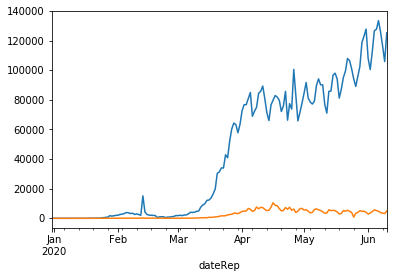

In [27]:
sum_cases_by_date = df.groupby("dateRep").sum()["cases"]

sum_cases_by_date.plot()

sum_deaths_by_date = df.groupby("dateRep").sum()["deaths"]

sum_deaths_by_date.plot()

According to the graph above, cases in blue and deaths in yellow, deaths have slightly decreased while cases are still rising. This points towards better general care for the infected.

# 2. Countries with the highest death rate to Covid-19

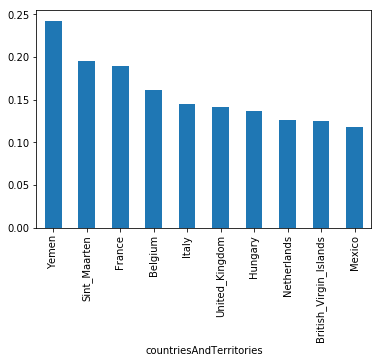

In [28]:
death_rates = (df.groupby("countriesAndTerritories").sum() ["deaths"]/ df.groupby("countriesAndTerritories").sum() ['cases'])

death_rates.nlargest(10).plot.bar()

The country with the highest death rate to Covid-19 is Yemen with a death rate of 0.242. This ratio can be expressed as a percent which means that people who have contracted covid-19 in Yemen is fatal about 25% of the time. The chance of surviving the disease is about 75%. This was calculted by taking the total number of deaths divided by the total number of cases. This yields the ratios seen below.

### Death Rate

In [29]:
death_rates.nlargest(10)

countriesAndTerritories
Yemen                     0.242366
Sint_Maarten              0.194805
France                    0.189507
Belgium                   0.161835
Italy                     0.144519
United_Kingdom            0.141395
Hungary                   0.136918
Netherlands               0.125900
British_Virgin_Islands    0.125000
Mexico                    0.117851
dtype: float64

### Survival Rate

In [30]:
-death_rates.nlargest(10) +1

countriesAndTerritories
Yemen                     0.757634
Sint_Maarten              0.805195
France                    0.810493
Belgium                   0.838165
Italy                     0.855481
United_Kingdom            0.858605
Hungary                   0.863082
Netherlands               0.874100
British_Virgin_Islands    0.875000
Mexico                    0.882149
dtype: float64

The first list of countries listed above deatails the greatest death rate for peopele who have contracted covid-19 in specific areas of the world. There are a number of reasons this could be be the case

1. Lack of treatment centers
2. Lack of social distancing 
3. Lack of medical supplies, such as ventilators
4. lack of information or technologies to implement systems to combat Covid-19

The second list details the survival rate of the same countries whcih is calculated by taking the negative values and adding 1. this number expresses how likely people will survive the virus in specific areas of the world.

# 3. countries with the greatest cases per capita

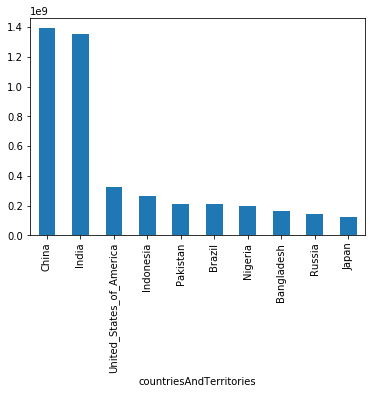

In [11]:
population = df.groupby("countriesAndTerritories").mean()["popData2018"]

population.nlargest(10).plot.bar()

### Greatest Populations

In [12]:
population.nlargest(10)

countriesAndTerritories
China                       1.392730e+09
India                       1.352617e+09
United_States_of_America    3.271674e+08
Indonesia                   2.676634e+08
Pakistan                    2.122150e+08
Brazil                      2.094693e+08
Nigeria                     1.958747e+08
Bangladesh                  1.613560e+08
Russia                      1.444780e+08
Japan                       1.265291e+08
Name: popData2018, dtype: float64

The bar graph displays nations with the greatest populations. China is number one with close to 1.4 billion people. India is next with 1.35 billion. the United states is 3rd with 327 million people.


### Cases Per Capita

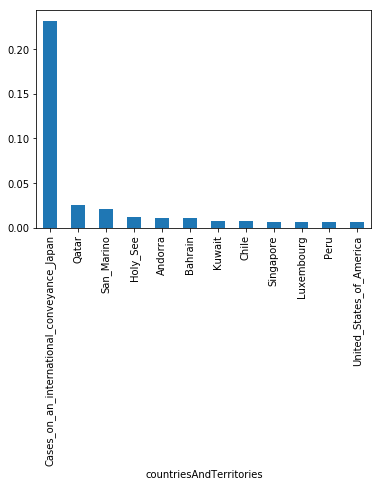

In [13]:
infection_cases = (df.groupby("countriesAndTerritories").sum() ["cases"] / df.groupby("countriesAndTerritories").mean()["popData2018"])


infection_cases.nlargest(12).plot.bar()


The bar graph above displays number of covid-19 cases per capita. the country with the greatest number of cases per capita is Japan. Japan is also accounting for many of the cruise ships that werent allowed to dock for fear of spreading the virus. This initial spread points to why Japan has the highest spike in cases per capita. The United states comes in as number 12, despite having twice the amount of cases as the second highest country, Brazil, as explained in the graph below.

### Nations with the highest cases

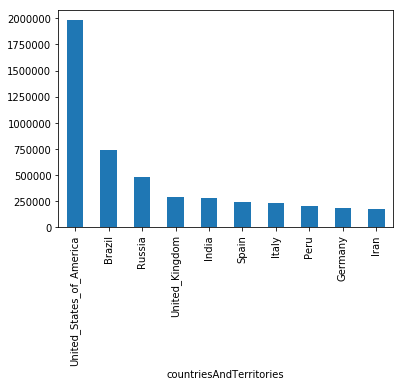

In [31]:
num_cases = df.groupby("countriesAndTerritories").sum() ['cases']

num_cases.nlargest(10).plot.bar()

# 4. Avg Death Rate From Covid-19 by Continent

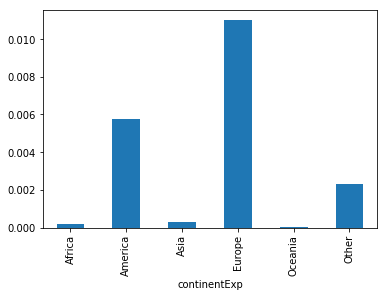

In [32]:
death_rate_cont = (df.groupby("continentExp").sum() ["deaths"] / df.groupby("continentExp").mean()["popData2018"])
death_rate_cont.plot.bar()


### Death Rate by Continent

In [33]:
death_rate_cont

continentExp
Africa     0.000190
America    0.005777
Asia       0.000288
Europe     0.010990
Oceania    0.000019
Other      0.002333
dtype: float64

The continent with the greatest deaths from Covid-19 per capita is Europe. America is second behind. This was calculated by dividing the number of cases by the mean population of each continent.

# Conclusion

When analyzing the data collected by the European Centre for Disease Prevention and Control, it is important to understand that many countries still don't have the proper equipment, operations, and testing strategies to assess the full impact of the Covid-19 pandemic. Despite this, it is still clear that the number of cases are still growing in areas where data is much more accurate. This indicates that the pandemic is far from over. Deaths, on the otherhand, seem to be slowly decreasing which means that the world is better adapting at handling Covid-19 victims.

# Limitations

The major data limitations for this assignment would have to be that many nations are ill equiped to provide accurate data. Despite this, conclusions about the state of the pandemic can still be drawn. There is also a technical limitation with my understanding of python, jupyter notebook, and matplotlib functions. With my currrent knowledge, the above charts and displays are the best that I can do with manipulating the data found within the uploaded excel file.  

# Sources

Download today's data on the geographic distribution of COVID-19 cases worldwide. (2020, June 07). Retrieved June 10, 2020, from https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

COVID-19 (2019 Novel Coronavirus). (2020, March 30). Retrieved June 11, 2020, from https://www.cdc.gov/library/researchguides/2019NovelCoronavirus.html

